# **GRU Exercise**

## Import libraries

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GRU
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras import layers

## load the dataset
### Dataset path : 5- Time series forecasting/2-2- Time Series Forecasting (LSTM and GRU)/ LAB/Dataset/traffic.csv


In [2]:
df = pd.read_csv('/content/traffic (2).csv', usecols=[2])
df

,Vehicles
0,15
1,13
2,10
3,7
4,9
...,...
48115,11
48116,30
48117,16
48118,22


## Data Exploration



In [3]:
df.head()

,Vehicles
0,15
1,13
2,10
3,7
4,9


In [4]:
df.tail()

,Vehicles
48115,11
48116,30
48117,16
48118,22
48119,12


In [5]:
df.sample()

,Vehicles
2519,26


# Normalization

In [7]:
scaler = MinMaxScaler()
df['Vehicles'] = scaler.fit_transform(df[['Vehicles']])

## split into train and test sets

In [10]:
train_size = int( len(df) * 0.80)
test_size = len(df) - train_size

train_data, test_data = df[0:train_size], df[train_size: len(df)]
print(len(train_data), len(test_data))

38496 9624


In [11]:
def create_dataset(df, look_back=32):
    dataX, dataY = [], []
    for i in range(len(df) - look_back - 1):
        a = df.iloc[i:(i + look_back)].values
        dataX.append(a)
        dataY.append(df.iloc[i + look_back].values)
    return np.array(dataX), np.array(dataY)

In [12]:
look_back=32
trainX, trainY = create_dataset(train_data, look_back)
testX, testY = create_dataset(test_data, look_back)

## Model Building



## Fitting The Model



In [14]:
model = Sequential([
    GRU(50, return_sequences=True, input_shape=(32, trainX.shape[2])),
    GRU(50, return_sequences=False),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')
history = model.fit(trainX, trainY, epochs = 3, batch_size=1, verbose=2)

Epoch 1/3


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


38463/38463 - 514s - 13ms/step - loss: 8.7134e-04
Epoch 2/3
38463/38463 - 561s - 15ms/step - loss: 6.2409e-04
Epoch 3/3
38463/38463 - 514s - 13ms/step - loss: 5.7294e-04


## Make preductuion and evaluatuin matrix.

In [16]:
# Make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# Reshape trainY and testY to 2D before inverse transformation
trainY_reshaped = trainY.reshape(-1, 1)
testY_reshaped = testY.reshape(-1, 1)

# Invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY_reshaped = scaler.inverse_transform(trainY_reshaped)
testPredict = scaler.inverse_transform(testPredict)
testY_reshaped = scaler.inverse_transform(testY_reshaped)

# Calculate root mean squared error
trainScore = np.sqrt(mean_squared_error(trainY_reshaped, trainPredict))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(testY_reshaped, testPredict))
print('Test Score: %.2f RMSE' % (testScore))

1202/1202 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step
300/300 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step
Train Score: 4.05 RMSE
Test Score: 4.85 RMSE


## Visualize the result

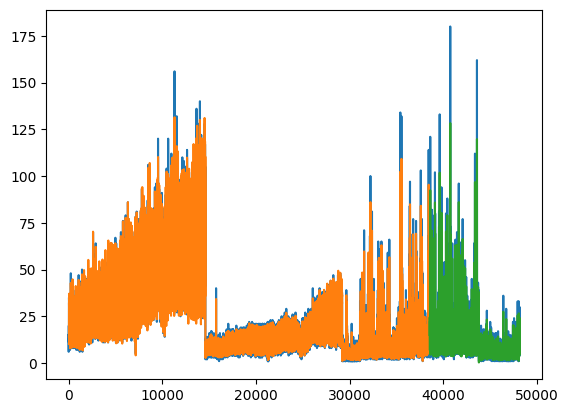

In [18]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(df)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(df)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

# **Well done** :)